In [90]:
import geopandas

In [91]:
import pandas as pd
import numpy as np

In [92]:
df = pd.read_excel (r'C:\Users\jennifer.rasal\OneDrive - Marine Stewardship Council\Documents\Kaggle\knitting\test_results.xlsx')

In [201]:
# create a df with just the country name and lat and long
data = [df["What country do you live in?"], df["Latitude"], df["Longitude"]]
headers = ["What country do you live in?", "Latitude", "Longitude"]

df3 = pd.concat(data, axis=1, keys=headers)

In [202]:
#turn the three columns into lists
country = df3["What country do you live in?"].values.tolist()
lat = df3["Latitude"].values.tolist()
long = df3["Longitude"].values.tolist()

In [203]:
# go through the three lists and match up the country name with it's lat and long values
latlong = {}
time = 0
for place in country:
    latlong[place] = [lat[time], long[time]]
    time= time+1

In [206]:
# get the count for how many times there is a response from that country
l = df3['What country do you live in?'].value_counts()
country_values = l.to_dict()

In [205]:
# merge the two dictionaries into one
ds = [latlong, country_values]
d = {}
for k in d1.keys():
    d[k] = tuple(d[k] for d in ds)

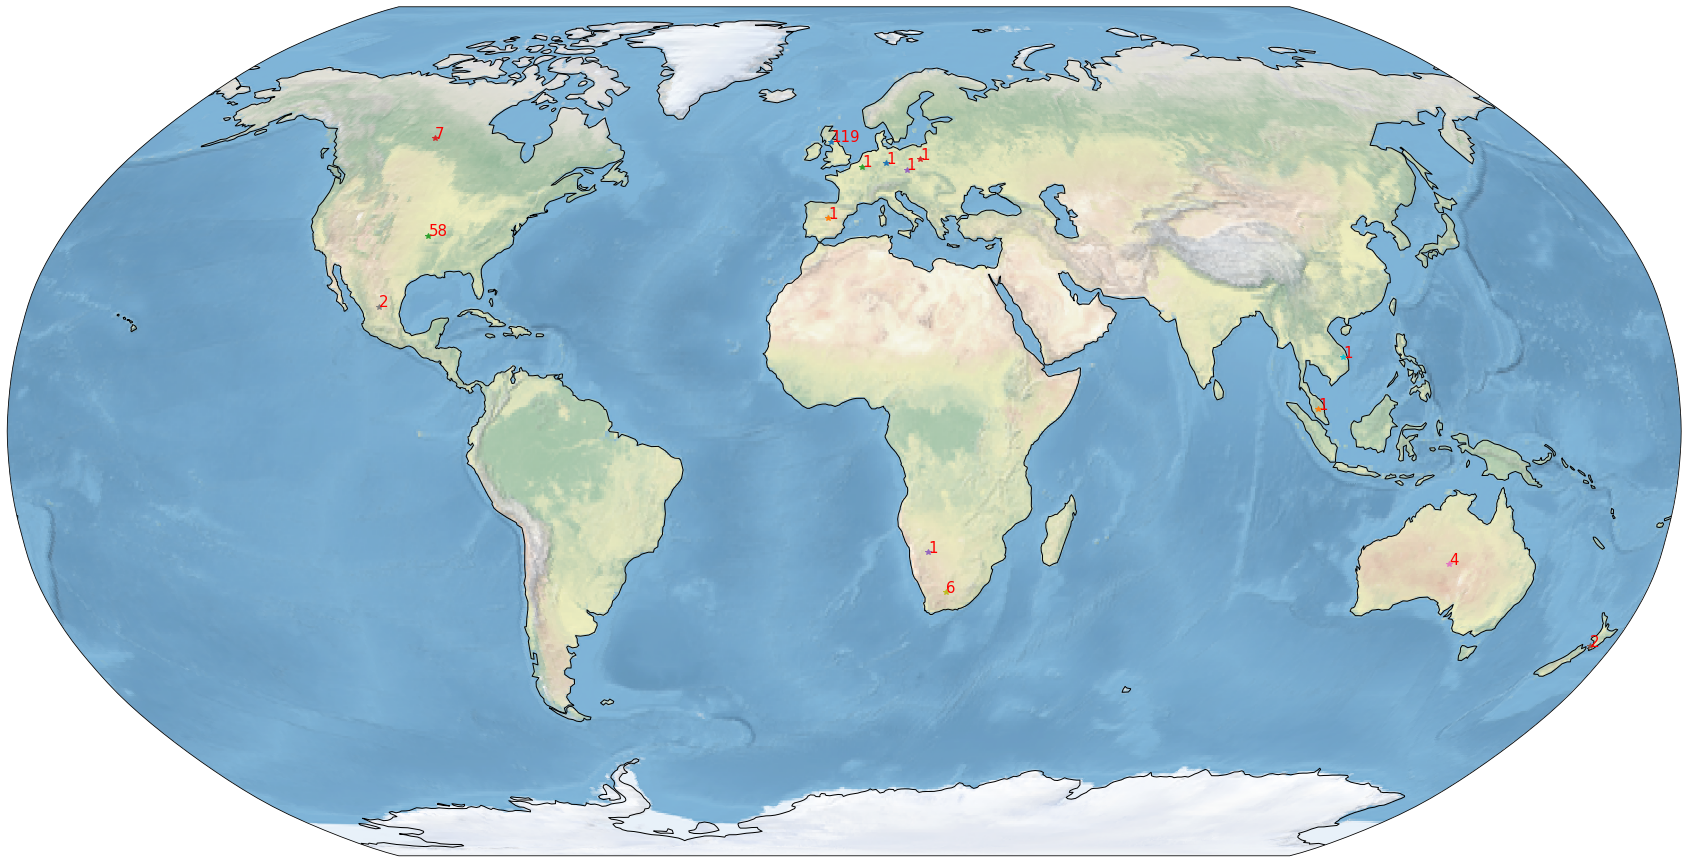

In [207]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

from matplotlib.pyplot import figure

def main():
    plt.figure(figsize=(30, 30))
    ax = plt.axes(projection=ccrs.Robinson())
    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()
    for country in d:
        x = d[country][0][0]
        y = d[country][0][1]
        t = d[country][1]
        plt.plot(y, x, '*', transform=ccrs.PlateCarree())
        plt.text(y, x, t, color="red", fontsize=15,transform=ccrs.PlateCarree())

main()
plt.savefig('knitting_map.png')
plt.show()